<a href="https://colab.research.google.com/github/AlvaroMAlves/Pred-Maintenance-Machine/blob/main/Predictive_Maintenance_of_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Maintenance of Machines

## Introduction

Import the necessary libraries:

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the database from GitHub:

In [2]:
url = 'https://raw.githubusercontent.com/AlvaroMAlves/Pred-Maintenance-Machine/main/predictive%20maintenance%20of%20machines.csv'
df = pd.read_csv(url)

Check the created dataframe:

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


The column analysis is as follows:

Machines have an ID and an ordinal categorical variable indicating the quality
of the machines, classified as Low, Medium, and High.

Data acquisition follows a time series. Observed data includes air temperature, process temperature, rotational speed, torque, and tool wear.

Starting from the "Machine Failure" column, the subsequent columns indicate binary information regarding the occurrence of a failure and specify the type of failure, following the mentioned format:

*   Tool wear failure (TWF)
*   Heat dissipation failure (HDF)
*   Power failure (PWF)
*   Overstrain failure (OSF)
*   Random failures (RNF)


Rename de column "UDI" to "UID", and setting "UID" as dataframe index:

In [4]:
df.rename(columns={'UDI': 'UID'}, inplace=True)
df.set_index('UID', inplace=True)

In [5]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UID,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## Exploratory Data Analysis

### Overview of the columns:

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB
None


We can observe that there are 10,000 rows and no null values in the dataset. Additionally, the columns "Air temperature", "Process temperature," and "Torque" are numeric continuous variables, while the "Rotational Speed" column contains discrete values.

### Descriptive Statistics Analysis

#### Central tendency measurement

In [7]:
print(df.describe())

       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  Machine failure           TWF  \
count  10000.000000     10000.000000     10000.000000  10000.000000   
mean      39.986910       107.951000         0.033900      0.004600   
std        9.968934        63.654147         0.180981      0.067671   
min 

It doesn't seem to have any inconsistent values. All the binary variables have a minimum value of 0 and a maximum value of 1. Let's count the number of failures and failure types:

In [8]:
column_counts = df.loc[df['Machine failure'] == 1, 'Machine failure':'RNF'].sum()
print(column_counts)

Machine failure    339
TWF                 46
HDF                115
PWF                 95
OSF                 98
RNF                  1
dtype: int64


The total number of failures is 339. The sum of failure types is 355. Let's see if there are rows with 2 or more failure types:

In [9]:
rows_with_two_failures = df[(df['Machine failure'] == 1) & (df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1) > 1)]

# rows with 2 or more failure types
selected_columns = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
print(rows_with_two_failures[selected_columns])

# rows count
count_rows = rows_with_two_failures.shape[0]
print("\n","Rows Count:", count_rows)

      Machine failure  TWF  HDF  PWF  OSF  RNF
UID                                           
70                  1    0    0    1    1    0
1325                1    0    0    1    1    0
1497                1    0    0    1    1    0
3612                1    1    0    0    0    1
3855                1    0    0    1    1    0
3944                1    0    0    1    1    0
4255                1    0    1    1    0    0
4343                1    0    1    1    0    0
4371                1    0    1    0    1    0
4384                1    0    1    0    1    0
4418                1    0    1    1    0    0
4463                1    0    1    0    1    0
4643                1    0    1    0    1    0
4644                1    0    1    0    1    0
4730                1    0    1    0    1    0
5395                1    0    0    1    1    0
5402                1    1    0    0    1    0
5910                1    1    0    1    1    0
6249                1    0    0    1    1    0
7084         

There are 23 rows with 2 and 1 row with 3 failure types, but numbers don't match yet. There must be some rows without any specified failure types:

In [10]:
rows_without_failures = df[(df['Machine failure'] == 1) & (df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1) == 0)]

# rows without any specified failure types
print(rows_without_failures[selected_columns])

# rows count
count_zero = rows_without_failures.shape[0]
print("\n","Rows Count:", count_zero)

      Machine failure  TWF  HDF  PWF  OSF  RNF
UID                                           
1438                1    0    0    0    0    0
2750                1    0    0    0    0    0
4045                1    0    0    0    0    0
4685                1    0    0    0    0    0
5537                1    0    0    0    0    0
5942                1    0    0    0    0    0
6479                1    0    0    0    0    0
8507                1    0    0    0    0    0
9016                1    0    0    0    0    0

 Rows Count: 9


The analysis is now correct. The total sum of failure types is 355. We have identified 23 rows with 2 failure types, one row with 3 failure types, and 9 rows without any failure types. Interestingly, this adds up to a total of 339, which matches exactly with the total count of machine failures.

#### Analyzing normal distribution: Skewness, kurtosis, Histograms

skewness and kurtosis:

In [12]:
# Numeric Variables
numeric_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurtosis()

print("SKEWNESS\n\n",skewness)
print("\n\nKURTOSIS\n\n",kurtosis)

SKEWNESS

 Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
dtype: float64


KURTOSIS

 Air temperature [K]       -0.835962
Process temperature [K]   -0.499734
Rotational speed [rpm]     7.392945
Torque [Nm]               -0.013241
Tool wear [min]           -1.166737
dtype: float64


**Skewness:**

*   Air temperature: Slightly right-skewed distribution.
*   Process temperature: Nearly symmetrical distribution.
*   Rotational speed: Moderately right-skewed distribution.
*   Torque: Nearly symmetrical distribution.
*   Tool wear: Nearly symmetrical distribution.

**Kurtosis:**

*   Air temperature: Platykurtic distribution (relatively flat).
*   Process temperature: Platykurtic distribution.
*   Rotational speed: Leptokurtic distribution (higher peak, heavier tails).
*   Torque: Nearly mesokurtic distribution (close to normal).
*   Tool wear: Platykurtic distribution.











We can see this more clearly examining the distribution patterns in the histograms:


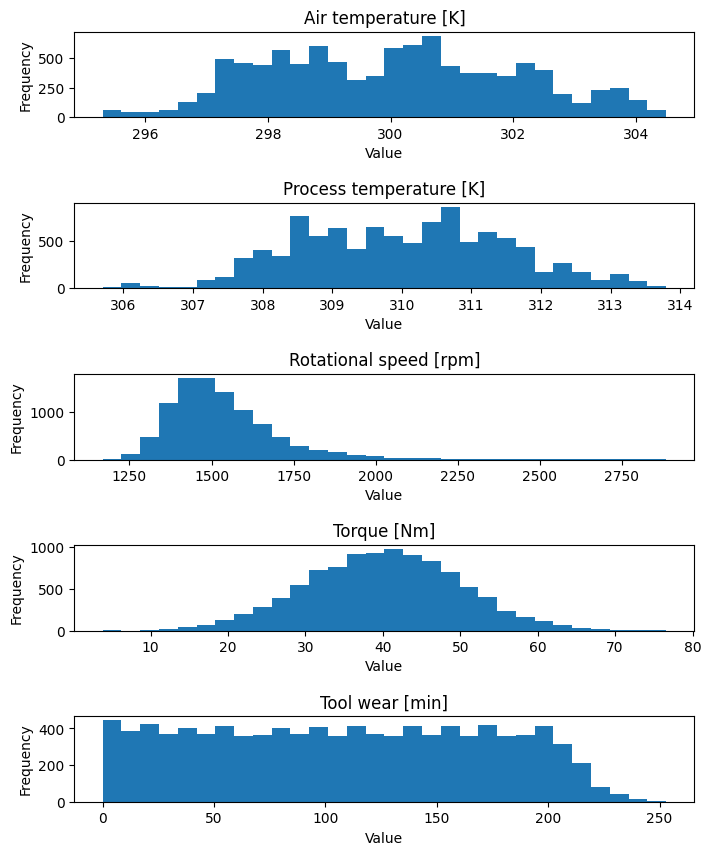

In [13]:
# Subplots layout configuration
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 10))
plt.subplots_adjust(hspace=1)

# histograms
for i, column in enumerate(numeric_columns):
    axes[i].hist(df[column], bins=30)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.show()

#### Correlation analysis: Correlation matrix and Scatterplots

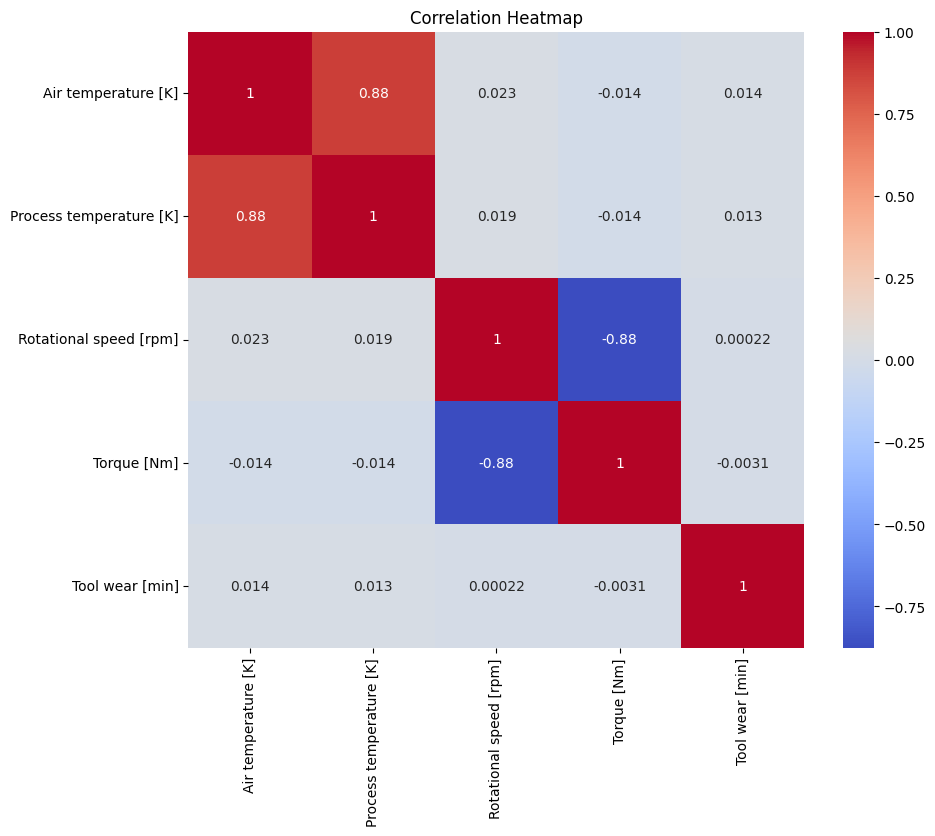

In [14]:
correlation_matrix = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

Analysing the correlation matrix above, let's make the scatterplots "Rotational speed vs Torque", and "Air temperature vs Process temperature"

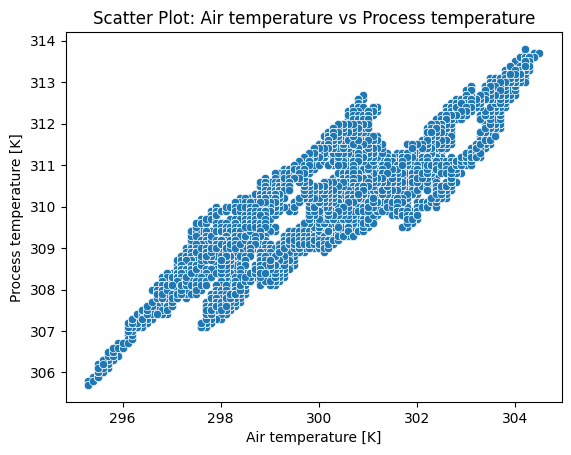

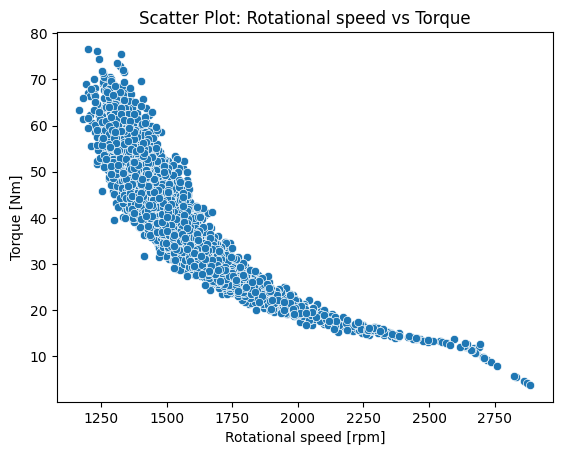

In [15]:
# Air temperature vs Process temperature
sns.scatterplot(data=df, x='Air temperature [K]', y='Process temperature [K]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.title('Scatter Plot: Air temperature vs Process temperature')
plt.show()

# Rotational speed vs Torque
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Torque [Nm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Scatter Plot: Rotational speed vs Torque')
plt.show()

Now we can see that the Air temperature has a positive correlation with Process temperature, and Rotational Speed has a negative correlation with Torque.

## Modelagem: Regressão Logística

Logistic regression can handle both numerical and categorical variables as predictors, and it is particularly useful for binary classification problems such as predicting the occurrence of failures. It is important to ensure that the dependent variable "Machine failure" is encoded as a binary variable (0 or 1).

The independent variables are "Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", and "Type". The dependent variable is "Machine failure".

Since the "Type" feature is an ordinal categorical variable, one-hot encoding will be used to create additional binary columns.

In [16]:
# Perform one-hot encoding on 'Type' variable
encoded_df = pd.get_dummies(df, columns=['Type'])

# Print the encoded dataframe
encoded_df.head()

,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
UID,,,,,,,,,,,,,,,
1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the predictor variables and the target variable
X = encoded_df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L', 'Type_M', 'Type_H']]
y = encoded_df['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define test values of C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# CCreate GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')

# Train the model with the training data
grid_search.fit(X_train, y_train)

# Get the best value of C
best_C = grid_search.best_params_['C']

# New model, with best value of C
final_model = LogisticRegression(C=best_C, max_iter=1000)

final_model.fit(X_train, y_train)

# Train new model
y_pred = final_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Evaluate precision
precision = precision_score(y_test, y_pred)

# Evaluate recall
recall = recall_score(y_test, y_pred)

# Evaluate f1-score
f1 = f1_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9735
Precision: 0.6428571428571429
Recall: 0.29508196721311475
F1 Score: 0.40449438202247195


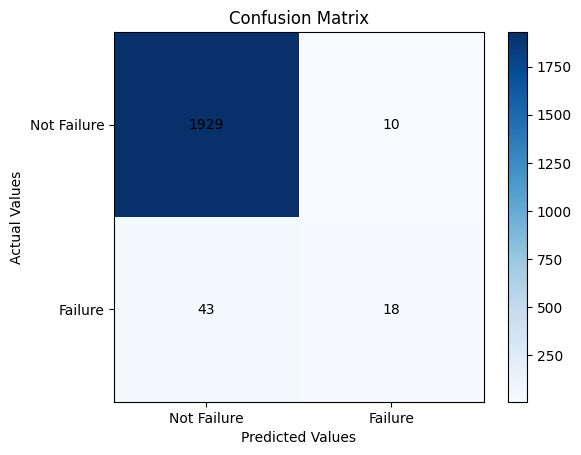

In [23]:
from sklearn.metrics import confusion_matrix

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plota a matriz de confusão em um gráfico
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.xticks([0, 1], ['Not Failure', 'Failure'])
plt.yticks([0, 1], ['Not Failure', 'Failure'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')


plt.show()

Ok. the high "Accuracy" of 97.5% is not as relevant because the majority of machines in the dataset do not actually experience failures, making the accuracy metric less informative for predicting the occurrence of failures accurately.

Our real problem is to predict potential failures, and this "Precision" of approximately 65% indicates that out of every 100 machines selected for preventive maintenance, 65 would actually have failures. It's a nice start!

However, the approximate "Recall" of 30% indicates that out of every 10 actual failures, only 3 would be predicted by the model, meaning that 70% of the machines that would have failures would not receive any prior maintenance or evaluation, a significant proportion.

Our objective is to identify a model that achieves a more optimal trade-off between precision and recall, as both metrics play crucial roles in our classification task of predicting potential failures.

Let's try to a undersampling in our majority class (